import libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [10]:
from google.colab import drive

In [11]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [13]:
data = pd.read_csv('emotions.csv')

In [14]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [15]:
data['label'].value_counts()

,count
label,
NEUTRAL,716
NEGATIVE,708
POSITIVE,708


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [17]:
label_maping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [18]:
data['label'] = data['label'].replace(label_maping)

/tmp/ipython-input-2558762912.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace(label_maping)


In [19]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,0
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,1
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,2
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,2
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,1


In [29]:
X = data.drop('label', axis=1)
y = data['label']

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
print('Shape X_Train:', X_train.shape)
print('Shape y_Train:', y_train.shape)
print('Shape X_Test:', X_test.shape)
print('Shape y_Test:', y_test.shape)

Shape X_Train: (1492, 2548)
Shape y_Train: (1492,)
Shape X_Test: (640, 2548)
Shape y_Test: (640,)


In [38]:
# X_train = X_train.reshape(X_train, (1492,1, 2548))
# X_test = X_test.reshape(X_test, (640,1,2548))
X_train = X_train.reshape(-1, 1, 2548)
X_test = X_test.reshape(-1, 1, 2548)

In [39]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

In [40]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 2548), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │       668,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 681,443 (2.60 MB)

 Trainable params: 681,443 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.7338 - loss: 0.6557 - val_accuracy: 0.9219 - val_loss: 0.3036
Epoch 2/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9058 - loss: 0.2563 - val_accuracy: 0.9328 - val_loss: 0.2128
Epoch 3/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9405 - loss: 0.1914 - val_accuracy: 0.9547 - val_loss: 0.1809
Epoch 4/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9486 - loss: 0.1186 - val_accuracy: 0.9266 - val_loss: 0.1681
Epoch 5/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9562 - loss: 0.0852 - val_accuracy: 0.9453 - val_loss: 0.1632
Epoch 6/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9725 - loss: 0.0745 - val_accuracy: 0.9406 - val_loss: 0.1452
Epoch 7/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9716 - loss: 0.0735 - val_accuracy: 0.9500 - val_loss: 0.1484
Epoch 8/200
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.0764 - val_accuracy: 0.9594 - 

In [45]:
y_pred_proba = model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [46]:
y_pred_proba[10]

array([2.1084198e-12, 9.9999988e-01, 9.6192366e-08], dtype=float32)

In [47]:
predict_labels = np.argmax(y_pred_proba, axis=1)

In [48]:
y_pred = predict_labels

In [49]:
y_pred[10]

np.int64(1)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
print(confusion_matrix(y_test, y_pred))

[[204   0   2]
 [  0 216   3]
 [  9   3 203]]


In [52]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

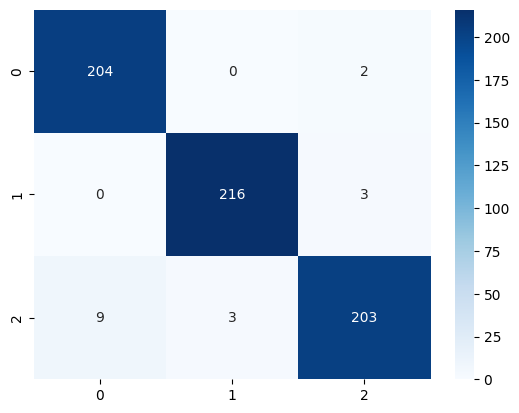

In [53]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       206
           1       0.99      0.99      0.99       219
           2       0.98      0.94      0.96       215

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640

